In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
%matplotlib inline  

print("done")

done


In [2]:
data = np.loadtxt('CasasMulti.txt')
#------------------------------------
#Adicione su código
#Objetivo: - separar la data en X = Training Set y y = targets
#          - Insertar una columna de 1's en X

X = np.ones((data.shape[0], data.shape[1]))
for i in range(1, data.shape[1]):
    X[:, i] = data[:, i-1]
    
y = np.c_[data[:,data.shape[1]-1]] 

# print some values
print("X = ")
print(X[0:3, :])
print("y = ")
print(y[0:3, :])
#-------------------------------------

X = 
[[   1.    132.3     3.      2.     66.15]
 [   1.    141.5     3.      2.     70.75]
 [   1.     71.2     1.      1.     71.2 ]]
y = 
[[ 319000.]
 [ 389000.]
 [ 199000.]]


In [3]:
#----------------------------------
#Adiciones su código
#Objetivo: Definir la función de normalización de características

def featureNormalize(X):
    X_norm = np.zeros(X.shape)
    mu = np.zeros((X.shape[1]))
    sigma = np.zeros((X.shape[1]))
    # mean normalization
    for i in range(1, X.shape[1]):
        mu[i] = np.mean(X[:,i])
        sigma[i] = np.std(X[:,i])
        X_norm[:, i] = (X[:, i] - mu[i]) / sigma[i]

    X_norm[:, 0] = X[:, 0]
    mu[0] = np.mean(X[:,0])
    return (X_norm, mu, sigma)
#-----------------------------------

In [4]:
Xr, mu, sigma = featureNormalize(X)
# yr = (y - np.mean(y))/np.std(y)
# mu_y = np.mean(y)
# sigma_y = np.mean(y)
print("Xr = ")
print(Xr[0:3, :])
# print("yr = ")
# print(yr[0:3, :])


Xr = 
[[ 1.         -0.66355517 -0.21267271 -0.46216187 -0.52150854]
 [ 1.         -0.58011822 -0.21267271 -0.46216187 -0.32598498]
 [ 1.         -1.21768534 -1.75454987 -1.14947953 -0.30685767]]


In [5]:
#----------------------------------
#Adiciones su código
#Objetivo: Definir la función de Costo Multiples variables
def computeCostMulti(X, y, theta):
    m = y.size
    J = 0    
    h = X.dot(theta)    
    J = np.sum(np.square(h-y))/(2*m)    
    return(J)
#--------------------------------------

# print("initial cost:", computeCostMulti(Xr, yr, np.zeros((Xr.shape[1],1))))
print("initial cost:", computeCostMulti(Xr, y, np.zeros((Xr.shape[1],1))))

initial cost: 120757428564.0


In [6]:
#----------------------------------
#Adiciones su código
#Objetivo: Definir la función Gradiente descendente para múltiples variables
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        # using vectorized operations (I could have used iterations too)
        theta = theta - (alpha*(X.T.dot(h-y)))/m
        J_history[iter] = computeCostMulti(X, y, theta)
    return(theta, J_history)
#----------------------------------

print("as a vectorized function")

as a vectorized function


theta:  [ 429402.06896552  268348.83308656  -86665.17766379   12714.65731788
   12708.40120182]
cost:  3115619588.84


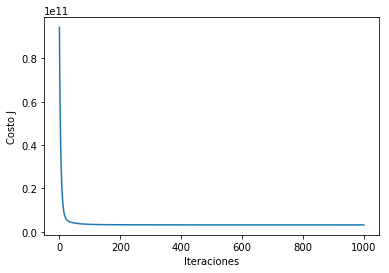

In [7]:
#Elige los parámetros de alfa e iteraciones
alpha = 0.1
num_iters = 1000
#Inicializa vector theta con ceros
theta = np.zeros((Xr.shape[1],1))
#Llamado a la función gradiente descendente para múltiples variables
# theta, J_history = gradientDescentMulti(Xr, yr, theta, alpha, num_iters)
theta, J_history = gradientDescentMulti(Xr, y, theta, alpha, num_iters)

# vector theta para el mínimo costo J
print('theta: ',theta.ravel())
print("cost: ", J_history[num_iters-1])

#Ploteo del historial de J
plt.plot(J_history)
plt.ylabel('Costo J')
plt.xlabel('Iteraciones');

In [8]:
#estimar el precio para una casa de: 200 m2, 4 baños, 5 dormitorios y $110xm2

sample=np.ones(5)
sample[1] = sample[1]*((200-mu[1])/sigma[1])
sample[2] = sample[2]*((4-mu[2])/sigma[2])
sample[3] = sample[3]*((5-mu[3])/sigma[3])
sample[4] = sample[4]*((110-mu[4])/sigma[4])
sample.dot(theta)

array([ 405118.13399272])

In [9]:
# Registro de ejemplo normalizado
sample

array([ 1.        , -0.04956805,  0.55826587,  1.5997911 ,  1.34234108])

In [10]:
#----------------------------------
#Adiciones su código
#Objetivo: Definir la función de Ecuación Normal
def normalEqn(X,y):
    theta = np.zeros((X.shape[1], 1))
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta
#-----------------------------------
print("done")

done


In [11]:
# Resolviendo el problema con la Ecuación Normal
X = np.c_[np.ones(data.shape[0]),data[:,0:4]]
theta = normalEqn(X,y)

In [12]:
sample=np.ones(5)
sample[1] = sample[1]*200
sample[2] = sample[2]*4
sample[3] = sample[3]*5
sample[4] = sample[4]*110
sample.dot(theta)

array([ 400482.89092719])

In [13]:
theta

array([[ 85545.80823212],
       [  2449.26277779],
       [-66328.49083389],
       [  7336.76959008],
       [   488.31493203]])

In [17]:
print("'y' could have been regularized too!")

'y' could have been regularized too!
